# Module Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

# Data Load

In [2]:
ifood_df = pd.read_csv('../ifood_df.csv')
project_df = pd.read_csv('../ml_project1_data.csv')

In [3]:
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# Preprocessing

In [4]:
##전처리코드
project_df = project_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
project_df = project_df[project_df['Income'].notna()].reset_index()

real_index = project_df['index'].values
project_df = project_df.drop(['index'], axis=1)

project_df['Year_Birth'] = project_df['Year_Birth'].apply(lambda x : np.abs(x-2023+1))

project_df['Year_Birth']=StandardScaler().fit_transform(project_df['Year_Birth'].values.reshape(-1,1))

accept_li = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp4', 'Response']
project_df['Accept_all'] = project_df[accept_li].sum(axis=1)


num_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Mnt_li = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']


def make_education_column(x:str):
    if x == '2n Cycle':
        x = 0
    elif x == 'Basic':
        x = 1
    elif x == 'Graduation':
        x = 2
    elif x == 'Master':
        x = 3
    else :
        x = 4
    return x

project_df['Education'] = project_df['Education'].apply(lambda x : make_education_column(x))

## 'marital_status' 전처리
dic_marital = {}
for ind, status in enumerate(set(project_df['Marital_Status'])) :
    dic_marital[status] = ind

project_df['Marital_Status'] = project_df['Marital_Status'].replace(dic_marital)

project_df['Income']=StandardScaler().fit_transform(project_df['Income'].values.reshape(-1,1))

project_df['Recency'] = StandardScaler().fit_transform(project_df['Recency'].values.reshape(-1,1))

project_df['year'] = project_df['Dt_Customer'].str.split('-').str.get(0).astype(int)
project_df['month'] = project_df['Dt_Customer'].str.split('-').str.get(1).astype(int)
project_df['day'] = project_df['Dt_Customer'].str.split('-').str.get(2).astype(int)

project_df['Mnt_all'] = project_df[Mnt_li].sum(axis=1)
mnt_every_li = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt_all']

scaler = StandardScaler()            
scaler.fit(project_df[mnt_every_li])                  
df_s = scaler.transform(project_df[mnt_every_li])     
df_s = pd.DataFrame(df_s, columns = mnt_every_li)
project_df[mnt_every_li] = df_s



project_df['Num_all'] = project_df[num_li].sum(axis=1)
num_every_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Num_all'] 

scaler = StandardScaler() 
scaler.fit(project_df[num_every_li])                  
df_s = scaler.transform(project_df[num_every_li])     
df_s = pd.DataFrame(df_s, columns = num_every_li)
project_df[num_every_li] = df_s

project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all
0,5524,0.986443,2,7,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,0,1,1,2012,9,4,1.675488,1.620547
1,2174,1.236801,2,7,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,0,2014,3,8,-0.962358,-1.263455
2,4141,0.318822,2,5,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,0,2013,8,21,0.280250,0.659213
3,6182,-1.266777,2,5,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,0,2014,2,10,-0.919224,-0.851455
4,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,0,2014,1,19,-0.307044,0.521879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,0.151917,2,0,0.356642,0,1,2013-06-13,-0.104093,1.197646,...,0,0,0,0,0,2013,6,13,1.217598,0.384546
2212,4001,1.904422,4,5,0.467539,2,1,2014-06-10,0.241428,0.299208,...,1,0,0,0,1,2014,6,10,-0.270546,1.208546
2213,7270,-1.016420,2,6,0.188091,0,0,2014-01-25,1.450751,1.787710,...,0,0,0,0,2,2014,1,25,1.051696,0.659213
2214,8235,1.069896,3,5,0.675388,0,1,2014-01-24,-1.417072,0.364441,...,0,0,0,0,0,2014,1,24,0.391404,0.796546


# Feature Selection

In [185]:
features_try1 = [ 'Accept_all','AcceptedCmp5', 'AcceptedCmp1', 'MntWines', 'MntMeatProducts'] 

In [186]:

features_try2 = ['Income', 'MntWines','NumCatalogPurchases']

In [187]:
features_try1.extend(features_try2)
features_1and2 = set(features_try1)
features_1and2

{'Accept_all',
 'AcceptedCmp1',
 'AcceptedCmp5',
 'Income',
 'MntMeatProducts',
 'MntWines',
 'NumCatalogPurchases'}

In [188]:
# features_1and2 = ['Accept_all', 'Income', 'MntMeatProducts', 'MntWines','NumCatalogPurchases']

In [189]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Accept_all', 'year', 'month',
       'day', 'Mnt_all', 'Num_all', 'label'],
      dtype='object')

In [190]:
# features = ['AcceptedCmp1', 'AcceptedCmp3', 'Accept_all',
#             'MntMeatProducts', 'MntWines']

# every_features = ['Income', 'Kidhome',
#             'Teenhome', 'Recency', 'MntWines', 'MntFruits',
#             'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#             'MntGoldProds', 'Mnt_all','NumDealsPurchases', 'NumWebPurchases',
#             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
#             ,'Marital_Status', 'Education', 'Year_Birth', 'NumDealsPurchases', 'NumWebPurchases',
#             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain',
#             'Response', 'Accept_all', 'year', 'month', 'day',
#             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
#              ]   
# Marital_Status
# Education
# 'Year_Birth'
# 'NumDealsPurchases', 'NumWebPurchases',
#             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
# 'Complain', 'Response', 'Accept_all', 'year', 'month', 'day'
# 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#             'AcceptedCmp2',
# project_df = project_df[features]

project_df1_cl = project_df[features_1and2]
# project_df1_cl = project_df[features_try2]
project_df1_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcceptedCmp5         2216 non-null   int64  
 1   AcceptedCmp1         2216 non-null   int64  
 2   MntMeatProducts      2216 non-null   float64
 3   MntWines             2216 non-null   float64
 4   Income               2216 non-null   float64
 5   NumCatalogPurchases  2216 non-null   float64
 6   Accept_all           2216 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 121.3 KB


C:\Users\jihoo\AppData\Local\Temp\ipykernel_4048\3544789074.py:24: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  project_df1_cl = project_df[features_1and2]


# Segmentation

## 차원축소

In [191]:


pca = PCA(n_components = 2)           # 2차원으로 시각화를 진행할 것이므로 2개로 설정한다.
pca.fit(project_df1_cl)             
df_p = pca.transform(project_df1_cl)
df_p = pd.DataFrame(df_p, columns = ['PC1','PC2']) #PCA진행 한 두 개의 값을 column으로 데이터프레임화 시킨다.
df_p

,PC1,PC2
0,2.780262,0.357498
1,-1.284556,0.229824
2,0.201287,0.388300
3,-1.783199,0.004842
4,-0.251685,0.505551
...,...,...
2211,0.707639,0.232640
2212,0.138986,-0.768603
2213,1.495880,-1.621966
2214,0.861780,0.683887


### Elbow graph 그리기 for KMeans

C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


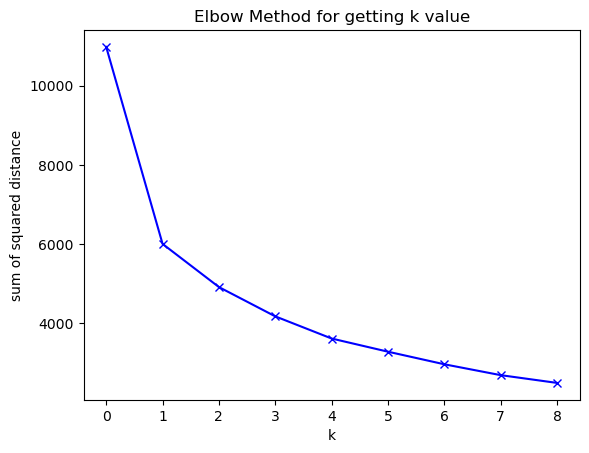

In [192]:
from sklearn.cluster import KMeans              # KMeans 라이브러리를 불러온다.

sum_of_squared_distance = []                    # k의 개수를 구하기 위한 엘보우 메소드의 요소를 넣을 list 변수 생성
K = range(1,10)                                 # 9개만 구해본다.
for k in K:                                     # 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정한다.
    km = KMeans(n_clusters = k)                   # KMeans 함수의 설정 - n_clusters = 군집의 개수(정확히는 군집의 centroid 개수이다)
    km = km.fit(project_df1_cl)                             # 해당 군집중앙의 개수를 정규화(표준화) 해놓은 project_df_cl data에 적용
    sum_of_squared_distance.append(km.inertia_)   # inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.




plt.plot(sum_of_squared_distance, '-bx')        # (default = line) plot을 그리고, 컬러를 blue, 포인터를 x로 놓는다. 
plt.xlabel('k')                                 # x축은 k로 지정
plt.ylabel('sum of squared distance')           # y축엔 거리제곱합의 이름
plt.title('Elbow Method for getting k value')   # 제목도 변경한다.
plt.show()    

C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


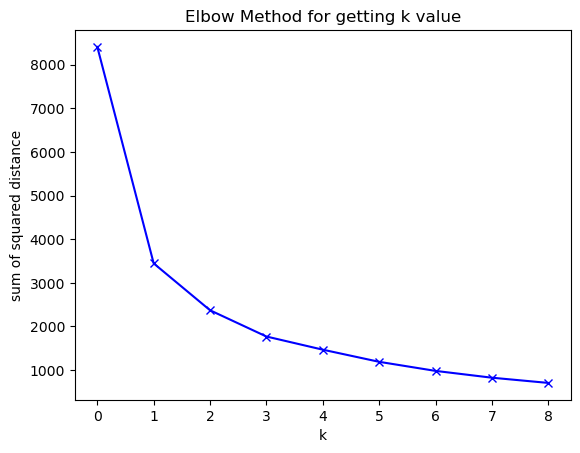

In [193]:
from sklearn.cluster import KMeans              # KMeans 라이브러리를 불러온다.

sum_of_squared_distance = []                    # k의 개수를 구하기 위한 엘보우 메소드의 요소를 넣을 list 변수 생성
K = range(1,10)                                 # 9개만 구해본다.
for k in K:                                     # 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정한다.
    km = KMeans(n_clusters = k)                   # KMeans 함수의 설정 - n_clusters = 군집의 개수(정확히는 군집의 centroid 개수이다)
    km = km.fit(df_p)                             # 해당 군집중앙의 개수를 정규화(표준화) 해놓은 df_p data에 적용
    sum_of_squared_distance.append(km.inertia_)   # inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.




plt.plot(sum_of_squared_distance, '-bx')        # (default = line) plot을 그리고, 컬러를 blue, 포인터를 x로 놓는다. 
plt.xlabel('k')                                 # x축은 k로 지정
plt.ylabel('sum of squared distance')           # y축엔 거리제곱합의 이름
plt.title('Elbow Method for getting k value')   # 제목도 변경한다.
plt.show()    

In [194]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100,
                tol=0.001, verbose=0, algorithm='elkan')
kmeans.fit(df_p)
label = kmeans.labels_
label = pd.Series(label)
df_p['label'] = label.values
df_p

,PC1,PC2,label
0,2.780262,0.357498,1
1,-1.284556,0.229824,0
2,0.201287,0.388300,1
3,-1.783199,0.004842,0
4,-0.251685,0.505551,0
...,...,...,...
2211,0.707639,0.232640,1
2212,0.138986,-0.768603,0
2213,1.495880,-1.621966,2
2214,0.861780,0.683887,1


Text(0, 0.5, 'PC2')

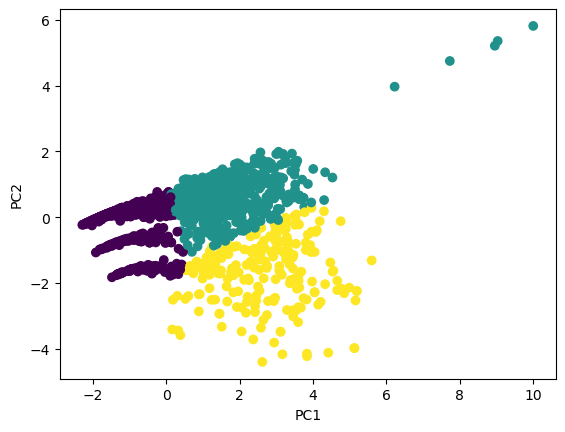

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df_p['PC1'], df_p['PC2'], c=df_p['label'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')

In [196]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100,
                tol=0.001, verbose=0, algorithm='elkan')
kmeans.fit(project_df1_cl)
label = kmeans.labels_
label = pd.Series(label)
df_p['label'] = label.values
df_p

,PC1,PC2,label
0,2.780262,0.357498,0
1,-1.284556,0.229824,1
2,0.201287,0.388300,0
3,-1.783199,0.004842,1
4,-0.251685,0.505551,1
...,...,...,...
2211,0.707639,0.232640,0
2212,0.138986,-0.768603,1
2213,1.495880,-1.621966,2
2214,0.861780,0.683887,0


Text(0, 0.5, 'PC2')

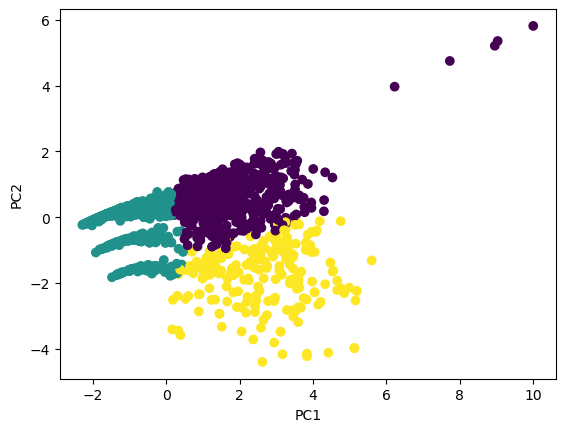

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df_p['PC1'], df_p['PC2'], c=df_p['label'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')

In [111]:
project_df['label'] = df_p['label']
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,4,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,1,1,2012,9,4,1.675488,1.620547,2
1,2174,1.236801,2,4,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,2014,3,8,-0.962358,-1.263455,0
2,4141,0.318822,2,5,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,2013,8,21,0.280250,0.659213,1
3,6182,-1.266777,2,5,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,2014,2,10,-0.919224,-0.851455,0
4,5324,-1.016420,4,3,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,2014,1,19,-0.307044,0.521879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,0.151917,2,3,0.356642,0,1,2013-06-13,-0.104093,1.197646,...,0,0,0,0,2013,6,13,1.217598,0.384546,1
2212,4001,1.904422,4,5,0.467539,2,1,2014-06-10,0.241428,0.299208,...,0,0,0,1,2014,6,10,-0.270546,1.208546,1
2213,7270,-1.016420,2,7,0.188091,0,0,2014-01-25,1.450751,1.787710,...,0,0,0,2,2014,1,25,1.051696,0.659213,1
2214,8235,1.069896,3,5,0.675388,0,1,2014-01-24,-1.417072,0.364441,...,0,0,0,0,2014,1,24,0.391404,0.796546,1


In [51]:
# project_df.to_csv('../with_cluster_df2.csv')

# Analysis

해야할일
- 클러스터링 된것들을 특정 기준에 따라서, 자동으로 잘 나뉘게끔 만들자 

In [220]:
data = pd.read_csv('../with_cluster_df2.csv', index_col = 0)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,4,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,1,1,2012,9,4,1.675488,1.620547,0
1,2174,1.236801,2,4,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
2,4141,0.318822,2,3,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,2013,8,21,0.280250,0.659213,0
3,6182,-1.266777,2,3,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
4,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,2014,1,19,-0.307044,0.521879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,0.151917,2,0,0.356642,0,1,2013-06-13,-0.104093,1.197646,...,0,0,0,0,2013,6,13,1.217598,0.384546,0
2212,4001,1.904422,4,3,0.467539,2,1,2014-06-10,0.241428,0.299208,...,0,0,0,1,2014,6,10,-0.270546,1.208546,1
2213,7270,-1.016420,2,6,0.188091,0,0,2014-01-25,1.450751,1.787710,...,0,0,0,2,2014,1,25,1.051696,0.659213,2
2214,8235,1.069896,3,3,0.675388,0,1,2014-01-24,-1.417072,0.364441,...,0,0,0,0,2014,1,24,0.391404,0.796546,0


In [221]:
## 라벨별 데이터프레임 지정
labels = set(project_df['label'])

for label in labels :
    globals()['label{}_df'.format(label)] = project_df[project_df['label'] == label].reset_index(drop=True)

In [222]:
label0_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,4,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,1,1,2012,9,4,1.675488,1.620547,0
1,4141,0.318822,2,3,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,2013,8,21,0.280250,0.659213,0
2,7446,0.151917,3,3,0.407899,0,1,2013-09-09,-1.140655,0.637234,...,0,0,0,0,2013,9,9,0.180708,1.071213,0
3,2125,0.819538,2,6,0.428560,0,0,2013-11-15,1.139782,-0.329403,...,0,0,0,0,2013,11,15,0.821091,-0.302121,0
4,6565,1.654064,3,0,0.983326,0,1,2013-03-28,1.450751,2.096085,...,0,0,0,1,2013,3,28,1.949227,1.483213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4286,-0.098441,4,4,0.214355,0,1,2014-01-09,-0.864239,0.815143,...,0,0,0,1,2014,1,9,0.119325,0.796546,0
642,9817,-0.098441,3,4,-0.295829,0,0,2012-08-21,0.759709,1.624627,...,0,0,0,0,2012,8,21,0.733163,2.032547,0
643,9432,-0.682609,2,3,24.413282,1,0,2013-06-02,-0.898791,-0.877954,...,0,0,0,0,2013,6,2,-0.904293,-0.439455,0
644,10870,0.151917,2,0,0.356642,0,1,2013-06-13,-0.104093,1.197646,...,0,0,0,0,2013,6,13,1.217598,0.384546,0


In [223]:
label1_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,2174,1.236801,2,4,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
1,6182,-1.266777,2,3,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
2,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,2014,1,19,-0.307044,0.521879,1
3,965,-0.181894,2,6,0.134609,0,1,2012-11-13,-0.518718,-0.207832,...,0,0,0,0,2012,11,13,-0.028328,0.933880,1
4,6177,-1.350230,4,0,-0.746730,1,0,2013-05-08,-0.587822,-0.679290,...,0,0,0,0,2013,5,8,-0.726777,-0.302121,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,7004,-1.266777,2,4,-1.638439,1,0,2013-03-16,1.139782,-0.833477,...,0,0,0,1,2013,3,16,-0.867794,-0.302121,1
1351,8080,-1.433683,2,4,-1.010484,0,0,2012-08-17,0.034115,-0.889815,...,0,0,0,0,2012,8,17,-0.970653,-1.675455,1
1352,8372,-0.432251,2,0,-0.708307,1,0,2013-07-01,1.105230,-0.895745,...,0,0,0,0,2013,7,1,-0.957381,-1.263455,1
1353,4001,1.904422,4,3,0.467539,2,1,2014-06-10,0.241428,0.299208,...,0,0,0,1,2014,6,10,-0.270546,1.208546,1


In [224]:
label2_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,2114,1.904422,4,4,1.213981,0,0,2012-11-24,-0.898791,2.078294,...,0,0,1,2,2012,11,24,1.174463,1.208546,2
1,1993,1.654064,4,0,0.252698,0,1,2012-12-23,0.483293,1.666139,...,0,0,0,2,2012,12,23,0.605418,0.659213,2
2,2968,2.154779,4,6,-0.131092,0,0,2013-02-01,0.137772,0.391127,...,0,0,1,2,2013,2,1,0.489287,1.345880,2
3,2225,-0.682609,2,6,1.205319,0,0,2014-06-07,0.172324,0.607583,...,0,0,1,3,2014,6,7,1.675488,0.247213,2
4,6853,-1.099872,3,4,0.934930,0,0,2013-07-04,-1.278863,1.206542,...,0,0,1,3,2013,7,4,1.378523,0.247213,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2666,-0.265346,3,0,0.953088,0,1,2014-02-06,-0.967895,0.634269,...,0,0,0,2,2014,2,6,0.497582,0.796546,2
211,8722,0.986443,0,0,1.195982,0,0,2012-11-06,-0.380509,0.743979,...,0,0,1,3,2012,11,6,2.067018,1.071213,2
212,7118,0.986443,2,0,0.856495,0,1,2012-08-01,0.414188,1.565324,...,0,0,1,2,2012,8,1,1.527835,1.071213,2
213,7366,-1.099872,3,4,0.934930,0,0,2013-07-04,-1.278863,1.206542,...,0,0,1,3,2013,7,4,1.378523,0.247213,2


특정기준
1. 참여를 많이 했는지에 대해서 3개의 데이터프레임 각각 비교 : Accept_all -> 다른 accept들 봐보기 
2. 많이 샀는지에 대해서 3개의 데이터프레임 각각 비교 : Mnt_all -> 다른 mnt들 봐보기 

In [225]:
label0_df.shape

(646, 34)

In [226]:
label1_df.shape

(1355, 34)

In [227]:
label2_df.shape

(215, 34)

In [228]:
def make_barplot(feature:str):

    fig = plt.figure(figsize=(10, 5))
    axs = fig.subplots(1,3).flatten()

    label0_df[feature].value_counts().sort_index().plot(kind='bar',ax=axs[0])
    axs[0].set_title('0_cluster')
    axs[0].set_ylim(0, 1500)

    label1_df[feature].value_counts().sort_index().plot(kind='bar',ax=axs[1])
    axs[1].set_title('1_cluster')
    axs[1].set_ylim(0, 1500)

    label2_df[feature].value_counts().sort_index().plot(kind='bar',ax=axs[2])
    axs[2].set_title('2_cluster')
    axs[2].set_ylim(0, 1500)

    fig.tight_layout()

In [229]:
features_try1 = ['Accept_all','MntWines', 'MntMeatProducts']
features_try2 = ['Income', 'MntWines', 'MntMeatProducts']

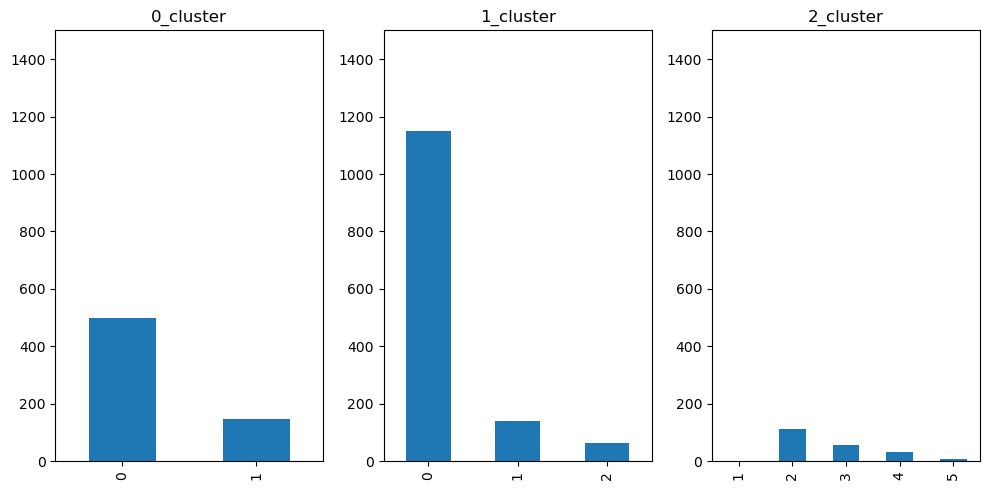

In [230]:
make_barplot('Accept_all')

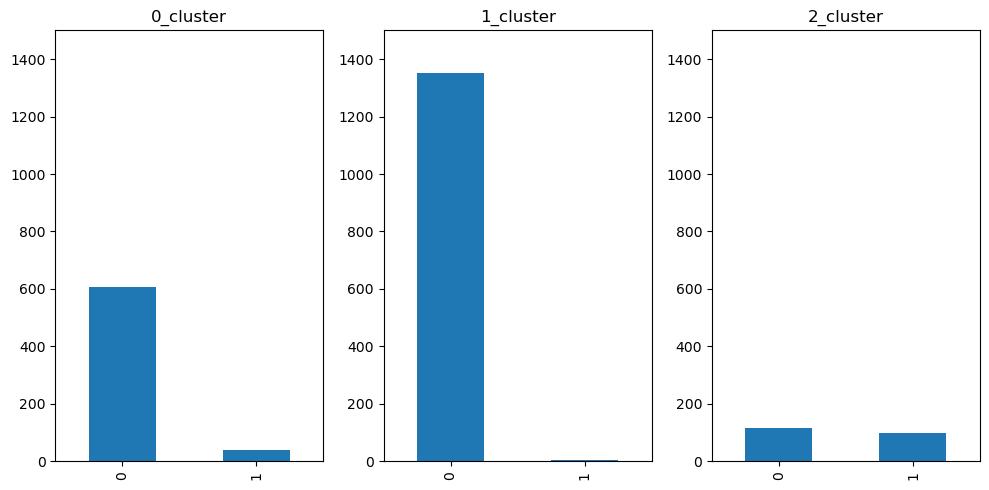

In [234]:
make_barplot('AcceptedCmp1')

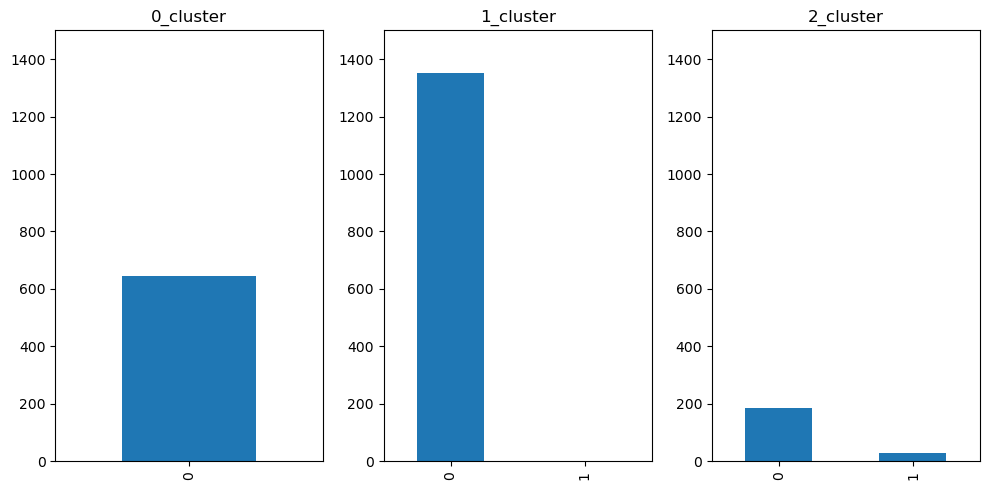

In [236]:
make_barplot('AcceptedCmp2')

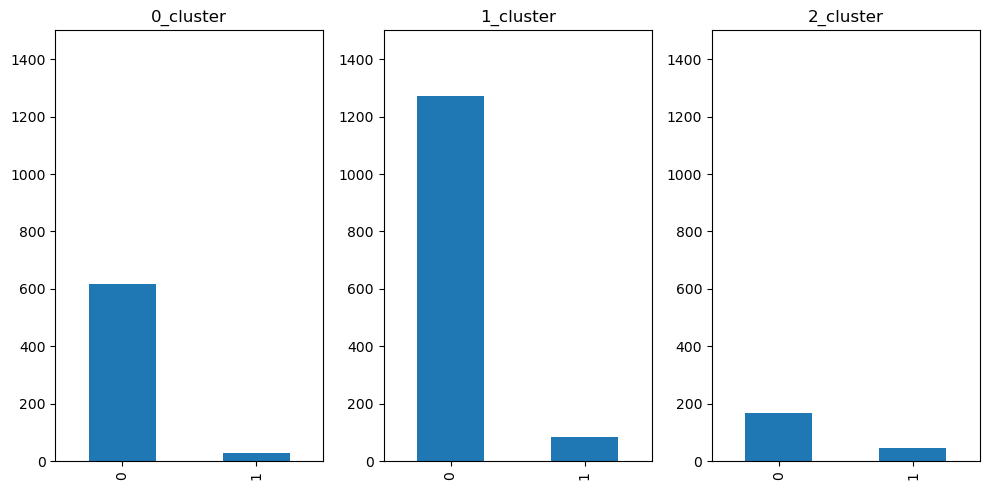

In [237]:
make_barplot('AcceptedCmp3')

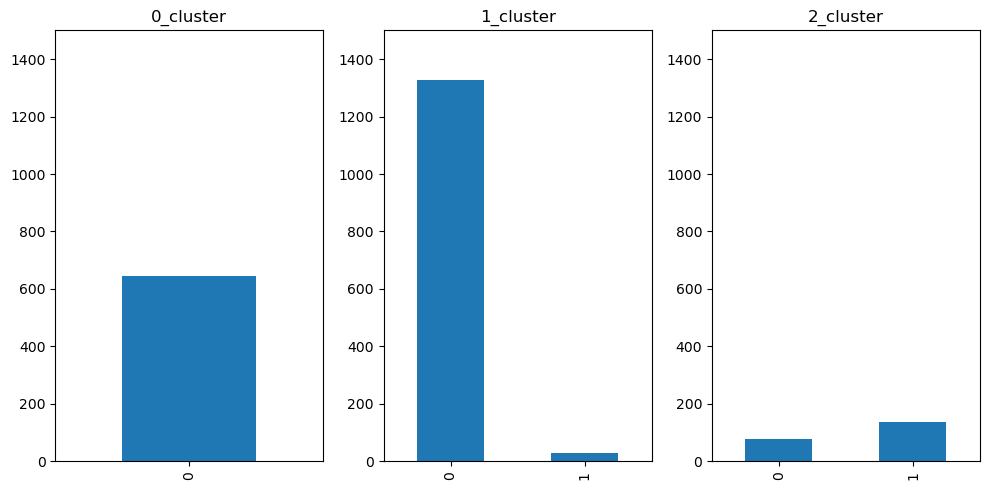

In [238]:
make_barplot('AcceptedCmp4')

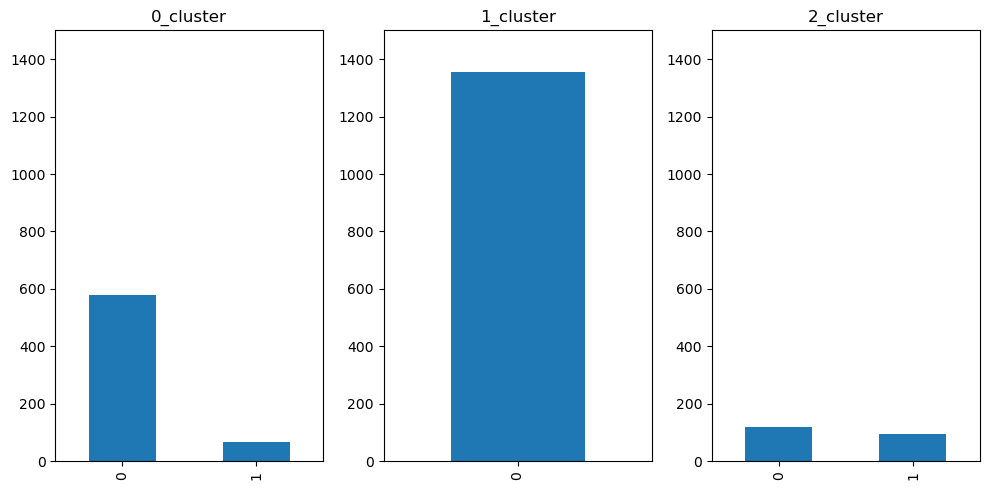

In [239]:
make_barplot('AcceptedCmp5')

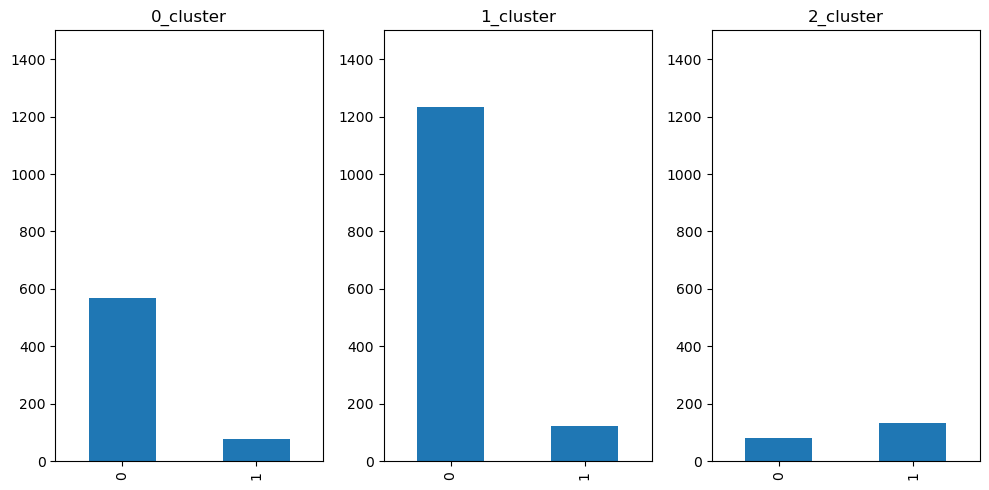

In [235]:
make_barplot('Response')

In [ ]:
label1_df[label1_df['AcceptedCmp5']==1]

In [62]:
project_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,1,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,1,1,2012,9,4,1.675488,1.620547,2
1,2174,1.236801,2,1,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
2,4141,0.318822,2,5,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,2013,8,21,0.280250,0.659213,2
3,6182,-1.266777,2,5,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
4,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,2014,1,19,-0.307044,0.521879,1


<AxesSubplot:>

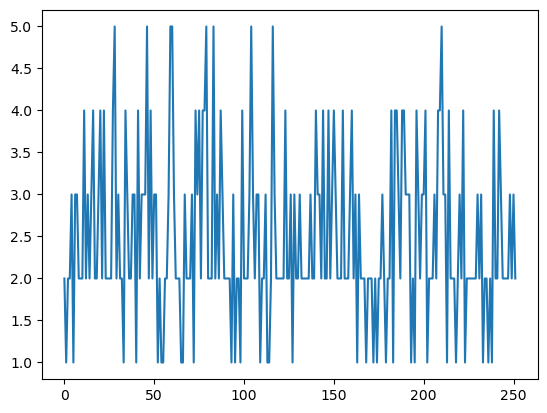

In [60]:
label0_df['Accept_all'].plot()

<AxesSubplot:>

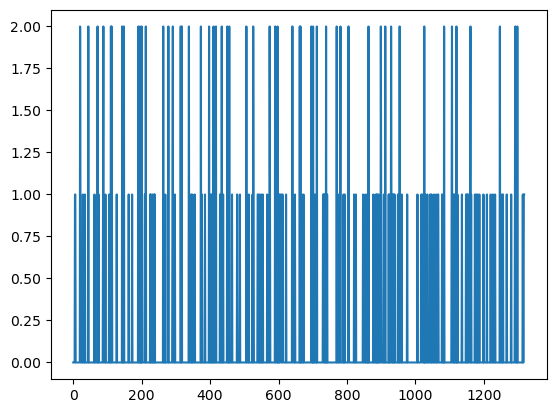

In [32]:
label1_df['Accept_all'].plot()

<AxesSubplot:>

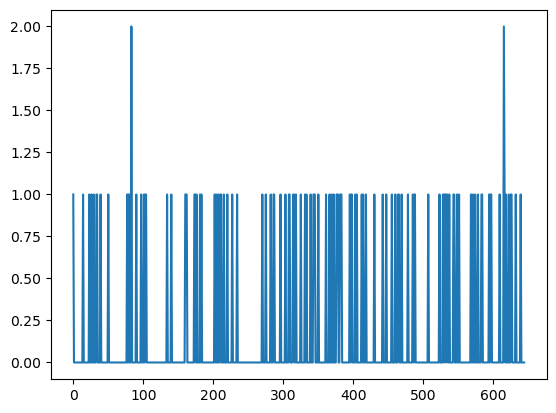

In [33]:
label2_df['Accept_all'].plot()